<h1 style="font-family: Courier New; font-size: 40px">Nyström Kernel PCR</h1>
<hr>

In this notebook we will go through an example of how to use kernel PCA with the Nyström method. We will load some data, calculate the Nyström PCA solution and compare it to kernel ridge regression with the Nyström method. Finally we illustrate the results through some plots.



<h1 style="font-family: Courier New; font-size: 25px">Data</h1>
<hr>

Let's load the example dataset we will use. We will use the Boston housing dataset.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston

data = load_boston()

X = data['data']

y = data['target']

pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


<h1 style="font-family: Courier New; font-size: 25px">Regression</h1>
<hr>

Let's run Nyström kernel PCR and compare with standard linear regression and kernel ridge regression.

In [2]:
from nystrompca import NystromKPCR

from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(f"Linear regression R-squared:\t{lin_reg.score(X_test, y_test):.3f}", )


krr = KernelRidge(kernel='rbf', gamma=1/10000)
krr.fit(X_train, y_train)

print(f"Kernel ridge R-squared:\t\t{krr.score(X_test, y_test):.3f}", )


nystrom_kpcr = NystromKPCR(sigma=100, n_components=100, m_subset=200, scale=False)
nystrom_kpcr.fit(X_train, y_train)

print(f"Nyström KPCR R-squared:\t\t{nystrom_kpcr.score(X_test, y_test):.3f}")

Linear regression R-squared:	0.746
Kernel ridge R-squared:		0.591
Nyström KPCR R-squared:		0.531


Nyström KPCR does better than standard kernel ridge regression in terms of the R-squared in this example. For this simple data set with mostly linear relationships in the data a regular linear regression often does best. Recall that an R-squared of 0 implies that a method does as well as just predicting the mean of the target variables.

<h1 style="font-family: Courier New; font-size: 25px">Plots</h1>
<hr>

Now we plot the actual versus predicted target values for the two models.

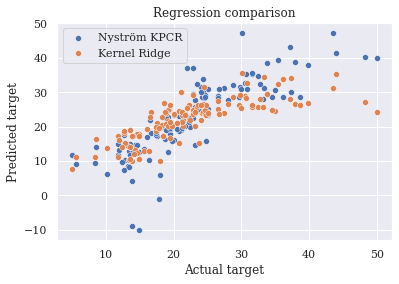

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(style='darkgrid')
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

sns.scatterplot(x=y_test, y=nystrom_kpcr.predict(X_test).squeeze())
sns.scatterplot(x=y_test, y=krr.predict(X_test))

plt.legend(['Nyström KPCR','Kernel Ridge'])
plt.title("Regression comparison")
plt.xlabel("Actual target")
plt.ylabel("Predicted target");